# 化合物の物性をとりあえず予測するための一通りのコード

In [1]:
#化合物処理の為の関数・クラス群
from RDKitWrapper import draw_SMILES,Fingerprint,RDKitDescriptors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# データベースの読み込み (data from wikipedia)

In [2]:
df=pd.read_csv("wiki.csv")
df

,ID,SMILES,pKa,Viscosity,Vapor pressure,Thermal Conductivity,Refractive index,Melting temperature,Absolute molar magnetic susceptibility,Partition coefficient,...,Density,Absolute standard enthalpy of formation,Boiling temperature,Band gap,Unnamed: 17,Notes,CompName,CASNo,Unnamed: 21,Compounds without SMILES were not used for machine learning
0,1,N,NaN,0.276,857.3,NaN,1.3327,-77.73,18.0,NaN,...,NaN,NaN,-33.34,NaN,NaN,NaN,Ammonia,7664-41-7,NaN,NaN
1,2,C#C,NaN,NaN,NaN,NaN,NaN,-80.8,12.5,NaN,...,NaN,226.88,NaN,NaN,NaN,NaN,Acetylene,74-86-2,NaN,NaN
2,3,O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2c...,6.5,NaN,NaN,NaN,NaN,187,NaN,NaN,...,1.040,NaN,NaN,NaN,NaN,NaN,Adenosine triphosphate,56-65-5,NaN,NaN
3,4,OC=1C(OC(=O)C=1O)[C@@H](O)CO,4.1/11.6,NaN,NaN,NaN,NaN,190/192,NaN,NaN,...,1.650,NaN,NaN,NaN,NaN,NaN,Chemistry of ascorbic acid,50-81-7,NaN,NaN
4,5,O[C@@H]3[C@@H](O)[C@H](O)[C@@H](CO)O[C@H]3OC[C...,NaN,NaN,NaN,NaN,NaN,223,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Amygdalin,29883-15-6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1366,F[Nd](F)F,NaN,NaN,NaN,NaN,NaN,1374,NaN,NaN,...,6.500,NaN,NaN,NaN,NaN,NaN,Neodymium fluoride,13709-42-7,NaN,NaN
1366,1367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.310,NaN,NaN,NaN,NaN,NaN,(Cyclopentadienyl)zirconium trichloride,34767-44-7,NaN,NaN
1367,1368,NaN,NaN,NaN,NaN,NaN,NaN,34/37,NaN,NaN,...,1.202,NaN,NaN,NaN,NaN,NaN,Xylylene dichloride,NaN,NaN,NaN
1368,1369,CCNC1=NC(=NC(=N1)Cl)NC(C)(C)C#N,NaN,NaN,NaN,NaN,NaN,168,NaN,NaN,...,1.260,NaN,NaN,NaN,NaN,NaN,Cyanazine,21725-46-2,NaN,NaN


In [3]:
#今回は融点を予測してみる
df=df[["SMILES","Melting temperature"]]
df

,SMILES,Melting temperature
0,N,-77.73
1,C#C,-80.8
2,O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2c...,187
3,OC=1C(OC(=O)C=1O)[C@@H](O)CO,190/192
4,O[C@@H]3[C@@H](O)[C@H](O)[C@@H](CO)O[C@H]3OC[C...,223
...,...,...
1365,F[Nd](F)F,1374
1366,NaN,NaN
1367,NaN,34/37
1368,CCNC1=NC(=NC(=N1)Cl)NC(C)(C)C#N,168


In [4]:
#抜けデータの削除
df2=df.dropna()
df2

,SMILES,Melting temperature
0,N,-77.73
1,C#C,-80.8
2,O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2c...,187
3,OC=1C(OC(=O)C=1O)[C@@H](O)CO,190/192
4,O[C@@H]3[C@@H](O)[C@H](O)[C@@H](CO)O[C@H]3OC[C...,223
...,...,...
1363,C1=CSC(=C1)Br,-10
1364,C(CN(CC(=O)O)CC(=O)O)C(=O)O,190/200
1365,F[Nd](F)F,1374
1368,CCNC1=NC(=NC(=N1)Cl)NC(C)(C)C#N,168


In [5]:
#複数の融点がスラッシュ区切りで記録されているので、はじめのデータのみを使う

#まずはスラッシュで区切られたものを分割する
spl_y_df=df2["Melting temperature"].str.split("/", expand=True)
spl_y_df

,0,1
0,-77.73,None
1,-80.8,None
2,187,None
3,190,192
4,223,None
...,...,...
1363,-10,None
1364,190,200
1365,1374,None
1368,168,None


In [6]:
#1列目を代入
df2["Melting temperature"]=spl_y_df[0]
df2

C:\Users\kan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SMILES,Melting temperature
0,N,-77.73
1,C#C,-80.8
2,O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2c...,187
3,OC=1C(OC(=O)C=1O)[C@@H](O)CO,190
4,O[C@@H]3[C@@H](O)[C@H](O)[C@@H](CO)O[C@H]3OC[C...,223
...,...,...
1363,C1=CSC(=C1)Br,-10
1364,C(CN(CC(=O)O)CC(=O)O)C(=O)O,190
1365,F[Nd](F)F,1374
1368,CCNC1=NC(=NC(=N1)Cl)NC(C)(C)C#N,168


# Descriptorの計算

In [7]:
#クラスを使用する為の初期化処理
desc=RDKitDescriptors()

In [8]:
#smilesのリストをSMILES_listに代入
SMILES_list=df2["SMILES"].values

#記述子を計算。一部の化合物でエラーが出る。
desc_list=[desc.calc(i,dict_mode=False) for i in SMILES_list]

desc_list[:2]

failed to purse:  c1[nH]c2c(n1)c(=O)nc(n2)N
please recheck SMILES
invalid smiles! c1[nH]c2c(n1)c(=O)nc(n2)N
failed to purse:  O=[Cl]=O
please recheck SMILES
invalid smiles! O=[Cl]=O
failed to purse:  [Cd+2].[Cd+2].[Cd+2].[AsH6-3].[AsH6-3]
please recheck SMILES
invalid smiles! [Cd+2].[Cd+2].[Cd+2].[AsH6-3].[AsH6-3]
failed to purse:  [H]1[BH]2[H][BH]3[BH]24[BH]1[H][BH]4[H]3
please recheck SMILES
invalid smiles! [H]1[BH]2[H][BH]3[BH]24[BH]1[H][BH]4[H]3
failed to purse:  [O-2]=[Ce+4]=[O-2]
please recheck SMILES
invalid smiles! [O-2]=[Ce+4]=[O-2]
failed to purse:  B1([H]3)(C2CCCC1CCC2)[H]B34C2CCCC4CCC2
please recheck SMILES
invalid smiles! B1([H]3)(C2CCCC1CCC2)[H]B34C2CCCC4CCC2
failed to purse:  FCl(F)(F)(F)F
please recheck SMILES
invalid smiles! FCl(F)(F)(F)F
failed to purse:  FBr(F)(F)(F)F
please recheck SMILES
invalid smiles! FBr(F)(F)(F)F
failed to purse:  o=c([o-])C.[N+H4]
please recheck SMILES
invalid smiles! o=c([o-])C.[N+H4]
failed to purse:  c1=cc=c[cH+]c=c1
please recheck SMILES
i

[array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.97555062e-01,  1.70310000e+01,  1.40070000e+01,  1.70265491e+01,
         8.00000000e+00,  0.00000000e+00, -3.43925736e-01, -3.43925736e-01,
         3.43925736e-01,  3.43925736e-01,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.07106781e-01,  7.07106781e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.00000000e-02,
         0.00000000e+00,  9.60000000e-01, -2.70400000e+01, -1.04040000e+02,
         7.50422812e+00,  6.15054635e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0

In [9]:
#エラーになった化合物では記述子の配列の代わりに-1が返るので、それをもとに選別フィルターを作成
available_filter=[(False if type(i)==type(1) else True) for i in desc_list]
available_filter

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 Tru

In [10]:
#エラーになっていないidのデータのみ残す
df3=df2[available_filter]
df3

,SMILES,Melting temperature
0,N,-77.73
1,C#C,-80.8
2,O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2c...,187
3,OC=1C(OC(=O)C=1O)[C@@H](O)CO,190
4,O[C@@H]3[C@@H](O)[C@H](O)[C@@H](CO)O[C@H]3OC[C...,223
...,...,...
1363,C1=CSC(=C1)Br,-10
1364,C(CN(CC(=O)O)CC(=O)O)C(=O)O,190
1365,F[Nd](F)F,1374
1368,CCNC1=NC(=NC(=N1)Cl)NC(C)(C)C#N,168


In [11]:
#yの設定
y=df3["Melting temperature"].values
y

array(['-77.73', '-80.8', '187', ..., '1374', '168', '155'], dtype=object)

In [12]:
#文字列になっているので、floatに変換
Y=np.array(y,dtype=np.float)
Y

array([ -77.73,  -80.8 ,  187.  , ..., 1374.  ,  168.  ,  155.  ])

In [13]:
#scikit-learnでは、yは下記の形に変換しないと計算ができない(おまじない)
Y=Y.reshape(-1,1)
Y

array([[ -77.73],
       [ -80.8 ],
       [ 187.  ],
       ...,
       [1374.  ],
       [ 168.  ],
       [ 155.  ]])

In [51]:
#計算に失敗した記述子は削除する
X=[x for x in desc_list if type(x)!=type(1)]

#numpyに変換
X=np.array(X)
X[:1]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.97555062e-01,  1.70310000e+01,
         1.40070000e+01,  1.70265491e+01,  8.00000000e+00,
         0.00000000e+00, -3.43925736e-01, -3.43925736e-01,
         3.43925736e-01,  3.43925736e-01,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.07106781e-01,
         7.07106781e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.00000000e-02,  0.00000000e+00,
         9.60000000e-01, -2.70400000e+01, -1.04040000e+02,
         7.50422812e+00,  6.15054635e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [52]:
print(X.shape)
print(Y.shape)

(1047, 200)
(1047, 1)


# 機械学習

,0,1
0,-89.4954,MaxEStateIndex
1,16.1385,MinEStateIndex
2,110.589,MaxAbsEStateIndex
3,4.17112,MinAbsEStateIndex
4,233.407,qed
...,...,...
195,270.405,fr_thiazole
196,-251.939,fr_thiocyan
197,-25.6854,fr_thiophene
198,-5.90963,fr_unbrch_alkane


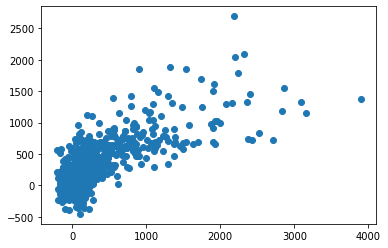

In [53]:
#線形回帰
from sklearn.linear_model import LinearRegression


model=LinearRegression()
model.fit(X,Y)

#結果の予測
pred_Y=model.predict(X)
plt.scatter(Y,pred_Y)

#係数を解析
import_param_df=pd.DataFrame((model.coef_[0],desc.desc_list)).T
import_param_df

C:\Users\kan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


,0,1
0,0.00489866,MaxEStateIndex
1,0.0105253,MinEStateIndex
2,0.00585055,MaxAbsEStateIndex
3,0.00570165,MinAbsEStateIndex
4,0.014258,qed
...,...,...
195,1.06036e-07,fr_thiazole
196,4.38397e-07,fr_thiocyan
197,4.66777e-10,fr_thiophene
198,4.85541e-05,fr_unbrch_alkane


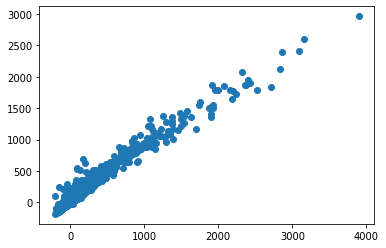

In [54]:
#random forest
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X,Y)

#結果の予測
pred_Y=model.predict(X)
plt.scatter(Y,pred_Y)

#パラメータの重要度を解析
import_param_df=pd.DataFrame((model.feature_importances_,desc.desc_list)).T
import_param_df

C:\Users\kan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58980295.88372781, tolerance: 22675.39266231727
  positive)


,0,1
0,11.3204,MaxEStateIndex
1,1.51045,MinEStateIndex
2,0,MaxAbsEStateIndex
3,-4.65959,MinAbsEStateIndex
4,213.465,qed
...,...,...
195,0,fr_thiazole
196,-7.31588,fr_thiocyan
197,0,fr_thiophene
198,3.4039,fr_unbrch_alkane


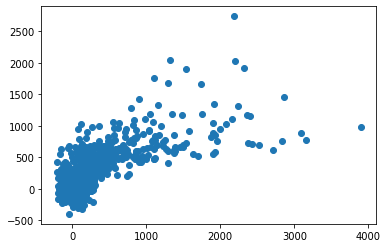

In [55]:
#lasso
from sklearn.linear_model import Lasso

model=Lasso(alpha=1)
model.fit(X,Y)

#結果の予測
pred_Y=model.predict(X)
plt.scatter(Y,pred_Y)


#係数を解析
import_param_df=pd.DataFrame((model.coef_,desc.desc_list)).T
import_param_df

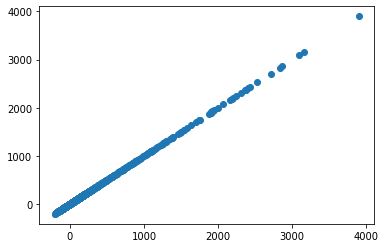

In [56]:
#gaussian process
from sklearn.gaussian_process import GaussianProcessRegressor

model=GaussianProcessRegressor()
model.fit(X,Y)

#結果の予測
pred_Y=model.predict(X)
plt.scatter(Y,pred_Y)

In [57]:
#信頼区間の表示
model.predict(X,return_std=True)

(array([[ -77.72999999],
        [ -80.79999999],
        [ 186.99999998],
        ...,
        [1373.99999986],
        [ 167.99999998],
        [ 154.99999998]]),
 array([1.00000004e-05, 1.00000004e-05, 1.00000004e-05, ...,
        1.00000004e-05, 1.00000004e-05, 1.00000004e-05]))

C:\Users\kan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


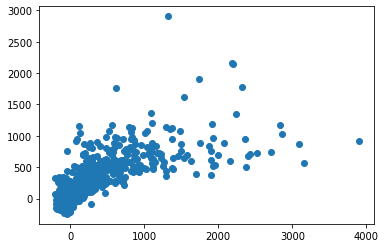

In [58]:
#neural net
from sklearn.neural_network import MLPRegressor

model=MLPRegressor()
model.fit(X,Y)

#結果の予測
pred_Y=model.predict(X)
plt.scatter(Y,pred_Y)
